In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df_train = pd.read_csv("selected_5000_xgb.csv")
df_test = pd.read_csv("predicted_actives_xgb.csv")

df_test

,USER_ID,D001,D002,D003,D004,D005,D006,D007,D008,D009,...,D768,D769,D770,D771,D772,D773,D774,D775,D776,D777
0,S782-0170,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,4.85798,-0.699350,0.240000,2.69151
1,L036-0317,3,0,0,1,4,0,0,0,0,...,0,0,0,0,0,0,5.70044,-0.816815,0.473684,3.33826
2,D488-0147,2,0,0,1,4,0,0,0,0,...,0,0,0,0,0,0,5.72792,-0.793711,0.307692,3.70433
3,L834-0668,2,0,0,1,3,0,0,0,0,...,0,0,0,0,0,0,5.20945,-0.711333,0.428571,3.69451
4,L834-0607,2,0,0,1,3,0,0,0,0,...,0,0,0,0,0,0,5.20945,-0.711333,0.428571,3.92439
5,F089-0042,3,0,0,1,3,1,0,0,0,...,0,0,0,0,0,1,5.75489,-0.737017,0.461538,3.24734
6,L834-0672,2,0,0,1,3,0,0,0,0,...,0,0,0,0,0,0,5.32193,-0.671500,0.387097,4.68560
7,S976-0539,1,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,5.16993,-0.722401,0.214286,1.25155
8,S768-0276,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,4.95420,-0.352843,0.222222,2.78289
9,L834-0553,3,0,0,1,4,0,0,0,0,...,0,0,0,0,0,1,5.72792,-0.737017,0.461538,3.72130


In [3]:
#Removing low variance columns
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=(.8*(1-.8)))

In [35]:
#Split dataset into training set and testing set
X = df_train
y = df_train['Activity']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [36]:
#Fit
_ = vt.fit(X_train)

In [37]:
#Get the mask
mask = vt.get_support()

In [38]:
#Subset the DataFrame
X_train = X_train.loc[:, mask]
X_test = X_test.loc[:,mask]

In [39]:
df_train_2 = X_train
df_train_2

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D755,D756,D758,D759,D761,D762,D763,D765,D770,D777
4413,2,1,4,17,6,7,5,12,49.0,26,...,0,0,1,1,0,2,2,0,1,3.07174
4375,3,1,3,21,6,13,3,18,52.0,26,...,0,1,0,1,1,0,2,1,0,3.21895
505,2,1,4,17,7,4,5,12,45.0,22,...,0,0,0,1,0,0,2,2,0,1.33298
4653,2,1,2,18,3,10,6,12,43.0,10,...,0,0,1,0,0,0,0,1,1,1.31969
4235,0,1,1,2,2,8,2,0,23.0,26,...,0,0,0,2,0,0,1,0,0,1.51996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1,1,2,9,4,10,3,6,34.0,23,...,1,2,1,1,1,0,0,0,1,1.16753
441,1,2,2,14,4,10,8,6,46.0,25,...,1,0,1,0,0,1,1,1,0,1.64939
730,2,1,4,18,11,4,7,11,44.5,15,...,1,0,1,1,0,0,1,1,0,2.37772
2903,1,2,1,11,3,11,5,6,36.0,19,...,0,1,1,1,0,0,0,3,1,1.51830


In [41]:
X = df_test.drop(['USER_ID'],axis=1)
y = df_test['USER_ID']
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.001)

In [42]:
#Fit
_ = vt.fit(X_train)

In [43]:
#Get the mask
mask = vt.get_support()
#Subset the DataFrame
test_X_train = X_train.loc[:, mask]
test_X_test = X_test.loc[:,mask]

In [44]:
df_test_2 = test_X_train
df_test_2

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D754,D755,D756,D758,D759,D761,D762,D763,D765,D777
8,1,0,1,7,4,9,1,6,31,30,...,1,1,0,1,0,0,1,0,0,2.78289
3,2,1,3,15,5,5,3,12,37,14,...,1,0,1,0,0,0,1,1,1,3.69451
7,1,0,3,11,4,9,5,6,36,22,...,2,1,0,1,1,0,0,1,1,1.25155
4,2,1,3,15,5,5,3,12,37,14,...,1,0,1,0,0,0,1,1,1,3.92439
2,2,1,4,20,6,10,8,12,53,24,...,1,0,0,1,0,2,0,0,2,3.70433
1,3,1,4,23,7,9,5,18,52,24,...,2,0,0,1,0,2,0,0,1,3.33826
10,3,0,5,23,6,8,5,18,54,23,...,3,0,0,0,1,0,1,0,1,2.20629
9,3,1,4,23,6,8,5,18,53,23,...,3,0,1,0,0,0,1,1,1,3.72130
0,1,0,1,7,2,7,1,6,29,23,...,1,0,1,1,1,0,0,0,0,2.69151
6,2,1,3,15,5,8,3,12,40,14,...,1,0,1,0,0,0,1,1,1,4.68560


In [46]:
df_extract = df_train_2.iloc[:,0:357]
df_lev = df_train_2.iloc[:,0:357]
df_extract

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D754,D755,D756,D758,D759,D761,D762,D763,D765,D770
4413,2,1,4,17,6,7,5,12,49.0,26,...,3,0,0,1,1,0,2,2,0,1
4375,3,1,3,21,6,13,3,18,52.0,26,...,2,0,1,0,1,1,0,2,1,0
505,2,1,4,17,7,4,5,12,45.0,22,...,3,0,0,0,1,0,0,2,2,0
4653,2,1,2,18,3,10,6,12,43.0,10,...,4,0,0,1,0,0,0,0,1,1
4235,0,1,1,2,2,8,2,0,23.0,26,...,2,0,0,0,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1,1,2,9,4,10,3,6,34.0,23,...,2,1,2,1,1,1,0,0,0,1
441,1,2,2,14,4,10,8,6,46.0,25,...,3,1,0,1,0,0,1,1,1,0
730,2,1,4,18,11,4,7,11,44.5,15,...,2,1,0,1,1,0,0,1,1,0
2903,1,2,1,11,3,11,5,6,36.0,19,...,1,0,1,1,1,0,0,0,3,1


In [47]:
df_test_extract = df_test_2.iloc[:,0:289]
df_test_lev = df_test_2.iloc[:,0:289]
df_test_extract

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D748,D754,D755,D756,D758,D759,D761,D762,D763,D765
8,1,0,1,7,4,9,1,6,31,30,...,3,1,1,0,1,0,0,1,0,0
3,2,1,3,15,5,5,3,12,37,14,...,1,1,0,1,0,0,0,1,1,1
7,1,0,3,11,4,9,5,6,36,22,...,2,2,1,0,1,1,0,0,1,1
4,2,1,3,15,5,5,3,12,37,14,...,1,1,0,1,0,0,0,1,1,1
2,2,1,4,20,6,10,8,12,53,24,...,2,1,0,0,1,0,2,0,0,2
1,3,1,4,23,7,9,5,18,52,24,...,1,2,0,0,1,0,2,0,0,1
10,3,0,5,23,6,8,5,18,54,23,...,0,3,0,0,0,1,0,1,0,1
9,3,1,4,23,6,8,5,18,53,23,...,1,3,0,1,0,0,0,1,1,1
0,1,0,1,7,2,7,1,6,29,23,...,2,1,0,1,1,1,0,0,0,0
6,2,1,3,15,5,8,3,12,40,14,...,1,1,0,1,0,0,0,1,1,1


In [48]:
#Calculating the mean and standard deviations of train dataset
mean = df_extract.mean(axis=0)
std = df_extract.std(axis=0)
df_train_3 = df_extract.append(pd.DataFrame([mean]),ignore_index=True)
df_train_3 = df_train_3.append(pd.DataFrame([std]),ignore_index=True)
df_train_3

C:\Users\brian\AppData\Local\Temp\ipykernel_36012\3096718968.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_3 = df_extract.append(pd.DataFrame([mean]),ignore_index=True)
C:\Users\brian\AppData\Local\Temp\ipykernel_36012\3096718968.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_3 = df_train_3.append(pd.DataFrame([std]),ignore_index=True)


,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D754,D755,D756,D758,D759,D761,D762,D763,D765,D770
0,2.000000,1.000000,4.000000,17.000000,6.000000,7.000000,5.000000,12.000000,49.000000,26.000000,...,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.000000,1.000000
1,3.000000,1.000000,3.000000,21.000000,6.000000,13.000000,3.000000,18.000000,52.000000,26.000000,...,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000
2,2.000000,1.000000,4.000000,17.000000,7.000000,4.000000,5.000000,12.000000,45.000000,22.000000,...,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000
3,2.000000,1.000000,2.000000,18.000000,3.000000,10.000000,6.000000,12.000000,43.000000,10.000000,...,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
4,0.000000,1.000000,1.000000,2.000000,2.000000,8.000000,2.000000,0.000000,23.000000,26.000000,...,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,2.000000,1.000000,4.000000,18.000000,11.000000,4.000000,7.000000,11.000000,44.500000,15.000000,...,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
4282,1.000000,2.000000,1.000000,11.000000,3.000000,11.000000,5.000000,6.000000,36.000000,19.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000
4283,1.000000,1.000000,2.000000,10.000000,4.000000,5.000000,4.000000,6.000000,28.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
4284,1.366246,0.818861,2.134220,11.957750,3.741830,7.994398,3.733660,8.169935,34.334034,18.849440,...,1.621382,0.406863,0.651261,0.418534,0.478758,0.267274,0.170635,0.382820,0.926704,0.331466


In [49]:
#Calculating the mean and standard deviations for test dataset
test_mean = df_test_extract.mean(axis=0)
test_std = df_test_extract.std(axis=0)
df_test_3 = df_test_extract.append(pd.DataFrame([mean]),ignore_index=True)
df_test_3 = df_test_3.append(pd.DataFrame([std]),ignore_index=True)
df_test_3

C:\Users\brian\AppData\Local\Temp\ipykernel_36012\3597620245.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_3 = df_test_extract.append(pd.DataFrame([mean]),ignore_index=True)
C:\Users\brian\AppData\Local\Temp\ipykernel_36012\3597620245.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test_3 = df_test_3.append(pd.DataFrame([std]),ignore_index=True)


,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D598,D606,D689,D716,D730,D733,D742,D745,D749,D770
0,1.000000,0.000000,1.000000,7.000000,4.000000,9.000000,1.000000,6.000000,31.000000,30.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.000000,1.000000,3.000000,15.000000,5.000000,5.000000,3.000000,12.000000,37.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.000000,0.000000,3.000000,11.000000,4.000000,9.000000,5.000000,6.000000,36.000000,22.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.000000,1.000000,3.000000,15.000000,5.000000,5.000000,3.000000,12.000000,37.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.000000,1.000000,4.000000,20.000000,6.000000,10.000000,8.000000,12.000000,53.000000,24.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.000000,1.000000,4.000000,23.000000,7.000000,9.000000,5.000000,18.000000,52.000000,24.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3.000000,0.000000,5.000000,23.000000,6.000000,8.000000,5.000000,18.000000,54.000000,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3.000000,1.000000,4.000000,23.000000,6.000000,8.000000,5.000000,18.000000,53.000000,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.000000,0.000000,1.000000,7.000000,2.000000,7.000000,1.000000,6.000000,29.000000,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2.000000,1.000000,3.000000,15.000000,5.000000,8.000000,3.000000,12.000000,40.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#Standardisation of descriptor values of train dataset
df_train_4 = df_lev.loc[:, :] - df_train_3.iloc[4284]
df_train_5 = df_train_4.abs()/ df_train_3.iloc[4284]
df_train_5['mean'] = df_train_5.mean(axis=1)
df_train_5['std'] = df_train_5.std(axis=1)
df_train_5['leverages'] = (df_train_5['mean'] + 1.28) * df_train_5['std']
df_train_5

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D758,D759,D761,D762,D763,D765,D770,mean,std,leverages
4413,0.463865,0.221209,0.874221,0.421672,0.603493,0.124387,0.339168,0.4688,0.427155,0.379351,...,1.389292,1.088737,1.000000,10.720930,4.224390,1.000000,2.016901,0.758065,1.016956,2.072621
4375,1.195797,0.221209,0.405666,0.756183,0.603493,0.626139,0.196499,1.2032,0.514532,0.379351,...,1.000000,1.088737,2.741485,1.000000,4.224390,0.079093,1.000000,1.050646,4.924918,11.478240
505,0.463865,0.221209,0.874221,0.421672,0.870742,0.499650,0.339168,0.4688,0.310653,0.167143,...,1.000000,1.088737,1.000000,1.000000,4.224390,1.158186,1.000000,0.611457,0.680210,1.286588
4653,0.463865,0.221209,0.062890,0.505300,0.198253,0.250876,0.607002,0.4688,0.252402,0.469480,...,1.389292,1.000000,1.000000,1.000000,1.000000,0.079093,2.016901,0.500959,0.676564,1.204933
4235,1.000000,0.221209,0.531445,0.832744,0.465502,0.000701,0.464333,1.0000,0.330111,0.379351,...,1.000000,3.177474,1.000000,1.000000,1.612195,1.000000,1.000000,0.520591,0.616830,1.110659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,0.268068,0.221209,0.062890,0.247350,0.068996,0.250876,0.196499,0.2656,0.009729,0.220195,...,1.389292,1.088737,2.741485,1.000000,1.000000,1.000000,2.016901,0.376891,0.552025,0.914645
441,0.268068,1.442417,0.062890,0.170789,0.068996,0.250876,1.142670,0.2656,0.339778,0.326299,...,1.389292,1.000000,1.000000,4.860465,1.612195,0.079093,1.000000,0.610832,0.763700,1.444029
730,0.463865,0.221209,0.874221,0.505300,1.939738,0.499650,0.874836,0.3464,0.296090,0.204220,...,1.389292,1.088737,1.000000,1.000000,1.612195,0.079093,1.000000,0.564900,1.036120,1.911538
2903,0.268068,1.442417,0.531445,0.080094,0.198253,0.375964,0.339168,0.2656,0.048522,0.007988,...,1.389292,1.088737,1.000000,1.000000,1.000000,2.237280,2.016901,0.372306,0.449182,0.742186


In [51]:
#Standardisation of descriptors values of test dataset
df_test_4 = df_test_lev.loc[:, :] - df_test_3.iloc[10]
df_test_5 = df_test_4.abs()/ df_test_3.iloc[10]
df_test_5['mean'] = df_test_5.mean(axis=1)
df_test_5['std'] = df_test_5.std(axis=1)
df_test_5['leverages'] = (df_test_5['mean'] + 1.28) * df_test_5['std']
df_test_5

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D758,D759,D761,D762,D763,D765,D770,mean,std,leverages
8,0.268068,1.000000,0.531445,0.414606,0.068996,0.125788,0.732166,0.2656,0.097106,0.591559,...,1.389292,1.000000,1.000000,4.860465,1.000000,1.000000,NaN,0.761950,5.477506,11.184793
3,0.463865,0.221209,0.405666,0.254417,0.336245,0.374562,0.196499,0.4688,0.077648,0.257272,...,1.000000,1.000000,1.000000,4.860465,1.612195,0.079093,NaN,0.399540,0.764618,1.284207
7,0.268068,1.000000,0.405666,0.080094,0.068996,0.125788,0.339168,0.2656,0.048522,0.167143,...,1.389292,1.088737,1.000000,1.000000,1.612195,0.079093,NaN,0.348598,0.558659,0.909831
4,0.463865,0.221209,0.405666,0.254417,0.336245,0.374562,0.196499,0.4688,0.077648,0.257272,...,1.000000,1.000000,1.000000,4.860465,1.612195,0.079093,NaN,0.596471,2.710327,5.085849
2,0.463865,0.221209,0.874221,0.672555,0.603493,0.250876,1.142670,0.4688,0.543658,0.273247,...,1.389292,1.000000,6.482969,1.000000,1.000000,1.158186,NaN,0.865069,0.984726,2.112306
1,1.195797,0.221209,0.874221,0.923439,0.870742,0.125788,0.339168,1.2032,0.514532,0.273247,...,1.389292,1.000000,6.482969,1.000000,1.000000,0.079093,NaN,0.838233,1.101330,2.332874
10,1.195797,1.000000,1.342776,0.923439,0.603493,0.000701,0.339168,1.2032,0.572783,0.220195,...,1.000000,1.088737,1.000000,4.860465,1.000000,0.079093,NaN,3.298696,27.360054,125.273369
9,1.195797,0.221209,0.874221,0.923439,0.603493,0.000701,0.339168,1.2032,0.543658,0.220195,...,1.000000,1.000000,1.000000,4.860465,1.612195,0.079093,NaN,0.875868,0.888687,1.915891
0,0.268068,1.000000,0.531445,0.414606,0.465502,0.124387,0.732166,0.2656,0.155357,0.220195,...,1.389292,1.088737,1.000000,1.000000,1.000000,1.000000,NaN,10.914212,168.628437,2056.290954
6,0.463865,0.221209,0.405666,0.254417,0.336245,0.000701,0.196499,0.4688,0.165025,0.257272,...,1.000000,1.000000,1.000000,4.860465,1.612195,0.079093,NaN,0.628906,1.945127,3.713064


In [52]:
#Max values of descriptors
maxValues = df_train_5[df_train_5.max(axis = 1) > 3]
maxValues

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D758,D759,D761,D762,D763,D765,D770,mean,std,leverages
4413,1.551123,0.311140,3.094378,2.773330,1.352086,1.189249,1.865630,1.576349,4.968365,3.294025,...,0.669545,0.378143,1.000000,3.939162,2.427671,1.000000,0.767278,3.941369,6.334719,33.075905
4375,2.826685,0.311140,2.070784,3.661172,1.352086,3.065748,0.719378,2.864523,5.333775,3.294025,...,1.000000,0.378143,1.034276,1.000000,2.427671,0.008754,1.000000,4.005920,6.291823,33.258076
505,1.551123,0.311140,3.094378,2.773330,1.744100,0.251000,1.865630,1.576349,4.481152,2.633405,...,1.000000,0.378143,1.000000,1.000000,2.427671,1.017508,1.000000,3.683122,6.393262,31.730537
4653,1.551123,0.311140,1.047189,2.995290,0.176043,2.127499,2.438756,1.576349,4.237545,0.651548,...,0.669545,1.000000,1.000000,1.000000,1.000000,0.008754,0.767278,3.406634,6.385996,29.928827
4235,1.000000,0.311140,0.023595,0.556079,0.215971,1.501999,0.146252,1.000000,1.801477,3.294025,...,1.000000,1.756286,1.000000,1.000000,0.713835,1.000000,1.000000,2.781239,6.125286,24.876251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,0.275562,0.311140,1.047189,0.997645,0.568057,2.127499,0.719378,0.288174,3.141315,2.798560,...,0.669545,0.378143,1.034276,1.000000,1.000000,1.000000,0.767278,3.147994,6.317119,27.972163
441,0.275562,1.622281,1.047189,2.107448,0.568057,2.127499,3.585008,0.288174,4.602955,3.128870,...,0.669545,1.000000,1.000000,1.469581,0.713835,0.008754,1.000000,3.603927,6.287776,30.709039
730,1.551123,0.311140,3.094378,2.995290,3.312158,0.251000,3.011882,1.361653,4.420250,1.477322,...,0.669545,0.378143,1.000000,1.000000,0.713835,0.008754,1.000000,3.390163,6.281006,29.333323
2903,0.275562,1.622281,0.023595,1.441566,0.176043,2.440249,1.865630,0.288174,3.384921,2.137941,...,0.669545,0.378143,1.000000,1.000000,1.000000,2.026263,0.767278,3.073238,6.326664,27.541475


In [53]:
df_train_6 = df_train_5.loc[df_train_5['leverages'] > 3]
df_train_6

,D001,D004,D005,D012,D013,D014,D016,D017,D018,D019,...,D758,D759,D761,D762,D763,D765,D770,mean,std,leverages
4413,1.551123,0.311140,3.094378,2.773330,1.352086,1.189249,1.865630,1.576349,4.968365,3.294025,...,0.669545,0.378143,1.000000,3.939162,2.427671,1.000000,0.767278,3.941369,6.334719,33.075905
4375,2.826685,0.311140,2.070784,3.661172,1.352086,3.065748,0.719378,2.864523,5.333775,3.294025,...,1.000000,0.378143,1.034276,1.000000,2.427671,0.008754,1.000000,4.005920,6.291823,33.258076
505,1.551123,0.311140,3.094378,2.773330,1.744100,0.251000,1.865630,1.576349,4.481152,2.633405,...,1.000000,0.378143,1.000000,1.000000,2.427671,1.017508,1.000000,3.683122,6.393262,31.730537
4653,1.551123,0.311140,1.047189,2.995290,0.176043,2.127499,2.438756,1.576349,4.237545,0.651548,...,0.669545,1.000000,1.000000,1.000000,1.000000,0.008754,0.767278,3.406634,6.385996,29.928827
4235,1.000000,0.311140,0.023595,0.556079,0.215971,1.501999,0.146252,1.000000,1.801477,3.294025,...,1.000000,1.756286,1.000000,1.000000,0.713835,1.000000,1.000000,2.781239,6.125286,24.876251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,0.275562,0.311140,1.047189,0.997645,0.568057,2.127499,0.719378,0.288174,3.141315,2.798560,...,0.669545,0.378143,1.034276,1.000000,1.000000,1.000000,0.767278,3.147994,6.317119,27.972163
441,0.275562,1.622281,1.047189,2.107448,0.568057,2.127499,3.585008,0.288174,4.602955,3.128870,...,0.669545,1.000000,1.000000,1.469581,0.713835,0.008754,1.000000,3.603927,6.287776,30.709039
730,1.551123,0.311140,3.094378,2.995290,3.312158,0.251000,3.011882,1.361653,4.420250,1.477322,...,0.669545,0.378143,1.000000,1.000000,0.713835,0.008754,1.000000,3.390163,6.281006,29.333323
2903,0.275562,1.622281,0.023595,1.441566,0.176043,2.440249,1.865630,0.288174,3.384921,2.137941,...,0.669545,0.378143,1.000000,1.000000,1.000000,2.026263,0.767278,3.073238,6.326664,27.541475


In [54]:
#Calculate the Applicability Domain of a new test compound
new_test = df_test_5.iloc[[2]]
new_test.index
s_new = new_test['leverages']
s_new = round(s_new, 3)
print(s_new)
if (s_new > 3).any():
  print('outlier')
elif (s_new < 3).any():
  print('not outlier')

7    0.91
Name: leverages, dtype: float64
not outlier


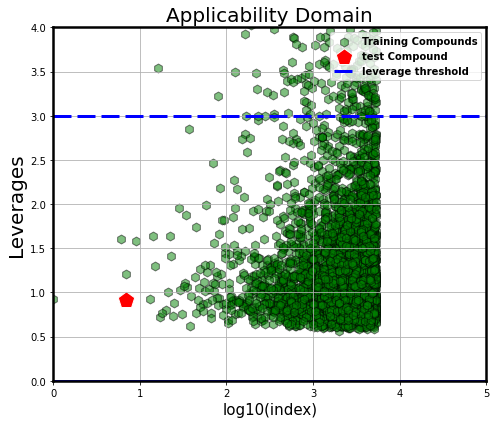

In [58]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 6))

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
legend_properties = {'weight':'bold'}

plt.scatter(np.log10(df_train_5.index), df_train_5['leverages'], c='green', s=80, alpha=0.5, label="Training Compounds", marker="h", edgecolors='black')
#plt.scatter(np.log10(X_test.index), X_test['leverages'], c='red', s=80, alpha=0.5, label="Test Compounds",  marker="*", edgecolors='black')

plt.scatter(np.log10(new_test.index), new_test['leverages'], c='red', s=300, label="test Compound", marker="p", edgecolors='white')

plt.axhline(y = 3, color = 'blue', linestyle = '-', linewidth=3 , dashes=[6, 2], label= 'leverage threshold' ) #Note threshold is x=3 
plt.axhline(y = 0, color = 'blue', linestyle = '-', linewidth=3)
plt.title("Applicability Domain", fontsize=20)
plt.xlabel("log10(index)", fontsize=15)
plt.ylabel("Leverages", fontsize=20)
plt.legend(loc="upper right", prop=legend_properties)
plt.ylim(0, 4)
plt.xlim(0, 5)
plt.grid()
fig.savefig('axg_AD.png')